In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
train = drive.CreateFile({'id':'106QMhyRRzz9U2bJLSEGHMqJdV8GRNiIf'})
train.GetContentFile('train.csv')
train = pd.read_csv("train.csv")

test = drive.CreateFile({'id':'1KTtdFxtZDYD8-nn7mqHhV3OPRd0dRYJx'})
test.GetContentFile('test.csv')
test = pd.read_csv("test.csv")

In [0]:
import pandas as pd

In [18]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [19]:
train.Activity.value_counts()

WALKING               209
STANDING              179
LAYING                164
WALKING_UPSTAIRS      159
WALKING_DOWNSTAIRS    145
SITTING               143
Name: Activity, dtype: int64

In [20]:
train.shape,test.shape

((999, 563), (999, 563))

In [21]:
test.Activity.value_counts()

WALKING               185
LAYING                183
STANDING              178
SITTING               170
WALKING_UPSTAIRS      149
WALKING_DOWNSTAIRS    134
Name: Activity, dtype: int64

In [0]:
# suffling data 
from sklearn.utils import shuffle

test  = shuffle(test)
train = shuffle(train)

In [0]:
# separating data inputs and output lables 
trainData  = train.drop('Activity' , axis=1).values
trainLabel = train.Activity.values

testData  = test.drop('Activity' , axis=1).values
testLabel = test.Activity.values

In [0]:
# encoding labels 
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

# encoding test labels 
encoder.fit(testLabel)
testLabelE = encoder.transform(testLabel)

# encoding train labels 
encoder.fit(trainLabel)
trainLabelE = encoder.transform(trainLabel)

In [0]:
# target variable is categorical
# IV's are num

In [0]:
# classification models:
# Decision tree
# SVM
# NN
# RF
# GBM
# DNN
# ANN
# DNN

In [0]:
# applying supervised neural network using multi-layer preceptron 
import sklearn.neural_network as nn 
mlpSGD  =  nn.MLPClassifier(hidden_layer_sizes=(90,)  \
                        , max_iter=1000 , alpha=1e-4  \
                        , solver='sgd' , verbose=10   \
                        , tol=1e-19 , random_state=1  \
                        , learning_rate_init=.001)

In [0]:
mlpADAM =  nn.MLPClassifier(hidden_layer_sizes=(90,)  \
                        , max_iter=1000 , alpha=1e-4  \
                        , solver='adam' , verbose=10  \
                        , tol=1e-19 , random_state=1  \
                        , learning_rate_init=.001) 

In [0]:
mlpLBFGS =  nn.MLPClassifier(hidden_layer_sizes=(90,)  \
                        , max_iter=1000 , alpha=1e-4  \
                        , solver='lbfgs' , verbose=10  \
                        , tol=1e-19 , random_state=1  \
                        , learning_rate_init=.001) 

In [30]:
nnModelSGD  = mlpSGD.fit(trainData , trainLabelE)

Iteration 1, loss = 2.15812766
Iteration 2, loss = 1.88317333
Iteration 3, loss = 1.67565407
Iteration 4, loss = 1.51338896
Iteration 5, loss = 1.37162137
Iteration 6, loss = 1.28071920
Iteration 7, loss = 1.20869827
Iteration 8, loss = 1.14569962
Iteration 9, loss = 1.09072244
Iteration 10, loss = 1.04168602
Iteration 11, loss = 1.00019158
Iteration 12, loss = 0.96051219
Iteration 13, loss = 0.92599506
Iteration 14, loss = 0.89496790
Iteration 15, loss = 0.86596015
Iteration 16, loss = 0.83981705
Iteration 17, loss = 0.81505179
Iteration 18, loss = 0.79221153
Iteration 19, loss = 0.77049063
Iteration 20, loss = 0.75044431
Iteration 21, loss = 0.73094780
Iteration 22, loss = 0.71269538
Iteration 23, loss = 0.69485770
Iteration 24, loss = 0.67866248
Iteration 25, loss = 0.66378530
Iteration 26, loss = 0.64793467
Iteration 27, loss = 0.63395617
Iteration 28, loss = 0.62057233
Iteration 29, loss = 0.60733132
Iteration 30, loss = 0.59464339
Iteration 31, loss = 0.58384866
Iteration 32, los

/usr/local/lib/python2.7/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [31]:
nnModelSGD  = mlpLBFGS.fit(trainData , trainLabelE)
nnModelSGD

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(90,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=1e-19,
       validation_fraction=0.1, verbose=10, warm_start=False)

In [32]:
nnModelADAM = mlpADAM.fit(trainData , trainLabelE)

Iteration 1, loss = 1.72139432
Iteration 2, loss = 1.12042314
Iteration 3, loss = 0.87401717
Iteration 4, loss = 0.71871170
Iteration 5, loss = 0.59904082
Iteration 6, loss = 0.51472665
Iteration 7, loss = 0.44806188
Iteration 8, loss = 0.39276093
Iteration 9, loss = 0.34745200
Iteration 10, loss = 0.31329564
Iteration 11, loss = 0.28692658
Iteration 12, loss = 0.26106802
Iteration 13, loss = 0.23676489
Iteration 14, loss = 0.21784875
Iteration 15, loss = 0.19933078
Iteration 16, loss = 0.18795897
Iteration 17, loss = 0.17025530
Iteration 18, loss = 0.16340217
Iteration 19, loss = 0.15555397
Iteration 20, loss = 0.14355408
Iteration 21, loss = 0.13250932
Iteration 22, loss = 0.12353414
Iteration 23, loss = 0.11687277
Iteration 24, loss = 0.11080926
Iteration 25, loss = 0.10491364
Iteration 26, loss = 0.09973162
Iteration 27, loss = 0.09442091
Iteration 28, loss = 0.09196418
Iteration 29, loss = 0.08646568
Iteration 30, loss = 0.08266234
Iteration 31, loss = 0.07979358
Iteration 32, los

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline

In [34]:
# load data
#https://s3.amazonaws.com/hackerday.datascience/112/test.csv
#https://s3.amazonaws.com/hackerday.datascience/112/train.csv

train = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/112/train.csv")
test = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/112/test.csv")
print('Train Data', train.shape,'\n', train.columns)
print('\nTest Data', test.shape)

('Train Data', (999, 563), '\n', Index([u'tBodyAcc-mean()-X', u'tBodyAcc-mean()-Y', u'tBodyAcc-mean()-Z',
       u'tBodyAcc-std()-X', u'tBodyAcc-std()-Y', u'tBodyAcc-std()-Z',
       u'tBodyAcc-mad()-X', u'tBodyAcc-mad()-Y', u'tBodyAcc-mad()-Z',
       u'tBodyAcc-max()-X',
       ...
       u'fBodyBodyGyroJerkMag-kurtosis()', u'angle(tBodyAccMean,gravity)',
       u'angle(tBodyAccJerkMean),gravityMean)',
       u'angle(tBodyGyroMean,gravityMean)',
       u'angle(tBodyGyroJerkMean,gravityMean)', u'angle(X,gravityMean)',
       u'angle(Y,gravityMean)', u'angle(Z,gravityMean)', u'subject',
       u'Activity'],
      dtype='object', length=563))
('\nTest Data', (999, 563))


In [35]:
print('Train labels', train['Activity'].unique(), '\nTest Labels', test['Activity'].unique())

('Train labels', array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object), '\nTest Labels', array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object))


In [36]:
pd.crosstab(train.subject, train.Activity)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,0,0,9,0,0,0


In [0]:
sub15 = train.loc[train['subject']==1]

In [38]:
sub15.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [39]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [40]:
train.subject.value_counts()

1    347
3    341
5    302
6      9
Name: subject, dtype: int64

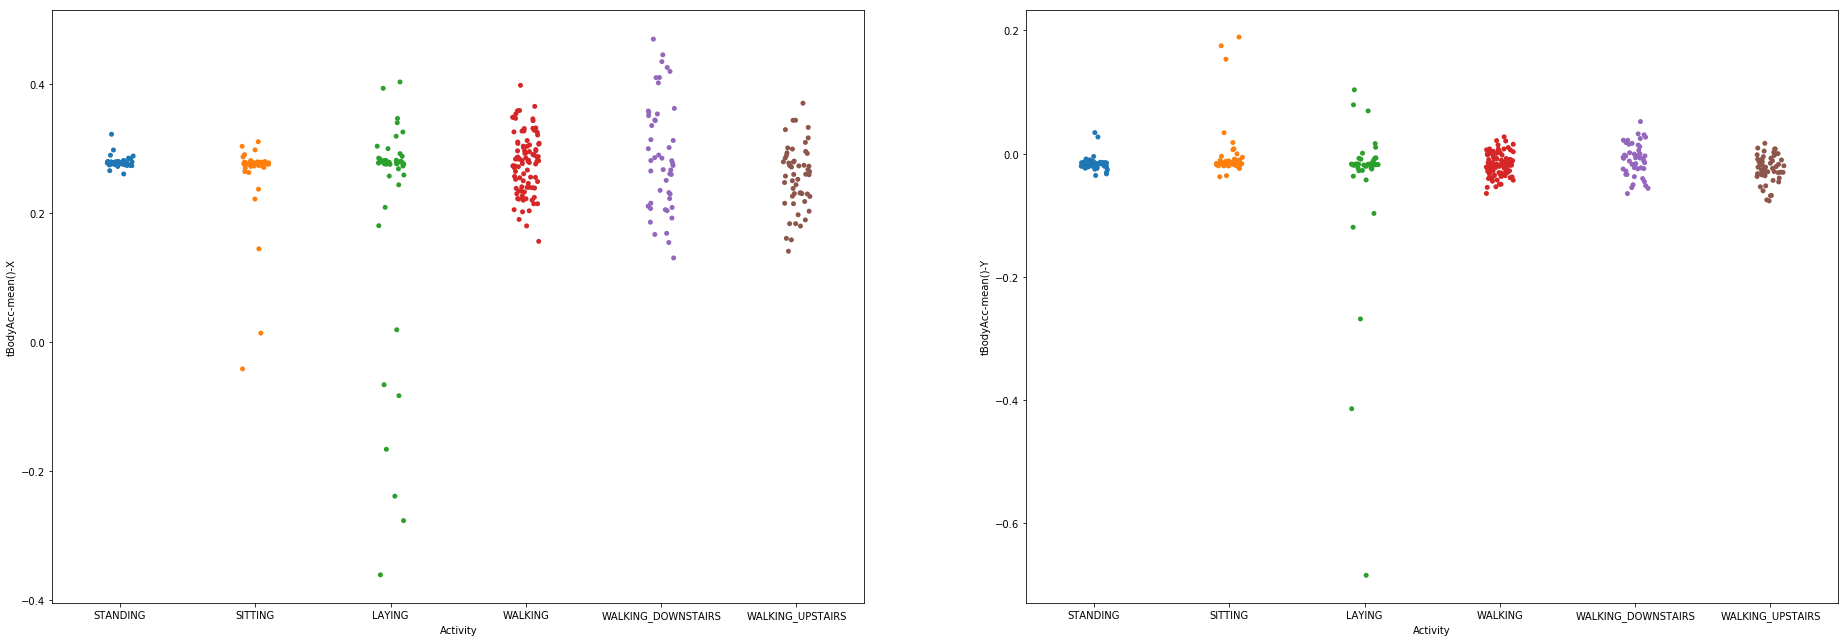

In [41]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sb.stripplot(x='Activity', y=sub15.iloc[:,0], data=sub15, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sb.stripplot(x='Activity', y=sub15.iloc[:,1], data=sub15, jitter=True)
plt.show()

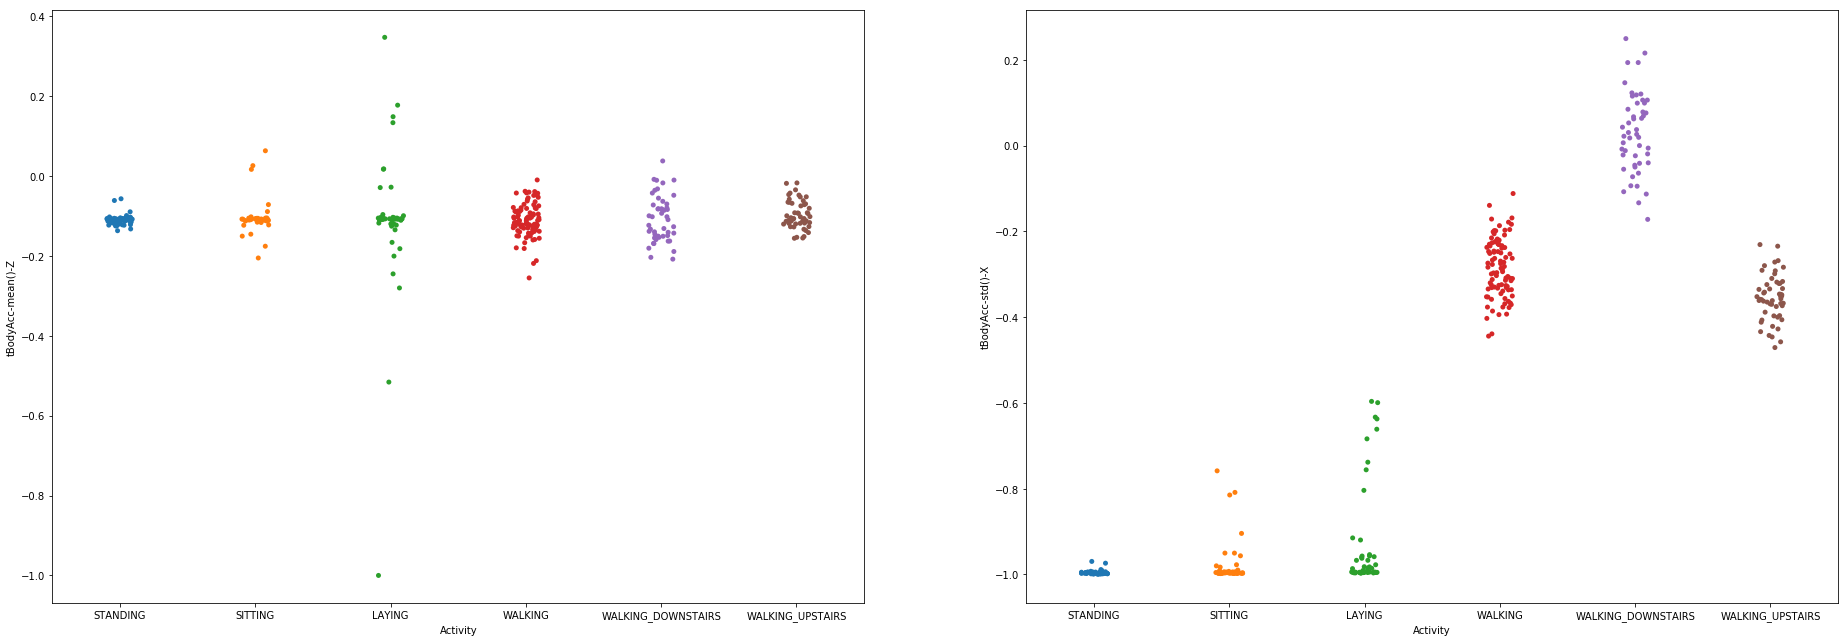

In [42]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sb.stripplot(x='Activity', y=sub15.iloc[:,2], data=sub15, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sb.stripplot(x='Activity', y=sub15.iloc[:,3], data=sub15, jitter=True)
plt.show()

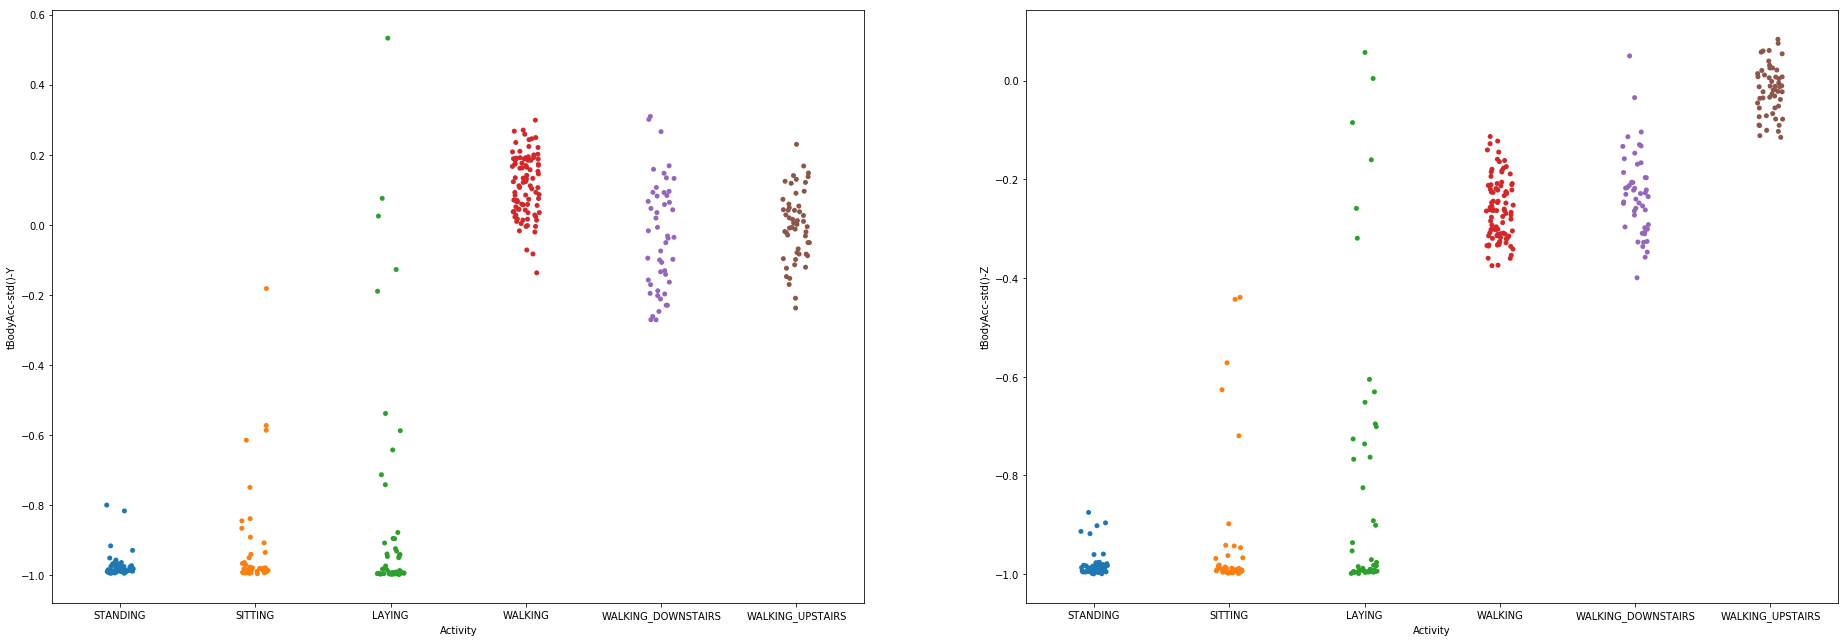

In [43]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sb.stripplot(x='Activity', y=sub15.iloc[:,4], data=sub15, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sb.stripplot(x='Activity', y=sub15.iloc[:,5], data=sub15, jitter=True)
plt.show()

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [45]:
#https://s3.amazonaws.com/hackerday.datascience/112/test.csv
#https://s3.amazonaws.com/hackerday.datascience/112/train.csv
train_df = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/112/train.csv")
test_df = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/112/test.csv")
train_df.columns

Index([u'tBodyAcc-mean()-X', u'tBodyAcc-mean()-Y', u'tBodyAcc-mean()-Z',
       u'tBodyAcc-std()-X', u'tBodyAcc-std()-Y', u'tBodyAcc-std()-Z',
       u'tBodyAcc-mad()-X', u'tBodyAcc-mad()-Y', u'tBodyAcc-mad()-Z',
       u'tBodyAcc-max()-X',
       ...
       u'fBodyBodyGyroJerkMag-kurtosis()', u'angle(tBodyAccMean,gravity)',
       u'angle(tBodyAccJerkMean),gravityMean)',
       u'angle(tBodyGyroMean,gravityMean)',
       u'angle(tBodyGyroJerkMean,gravityMean)', u'angle(X,gravityMean)',
       u'angle(Y,gravityMean)', u'angle(Z,gravityMean)', u'subject',
       u'Activity'],
      dtype='object', length=563)

In [46]:
unique_activities = train_df.Activity.unique()
print("NUmber of unique activities: {}".format(len(unique_activities)))
replacer = {}
for i, activity in enumerate(unique_activities):
    replacer[activity] = i
train_df.Activity = train_df.Activity.replace(replacer)
test_df.Activity = test_df.Activity.replace(replacer)
train_df.head(10)


NUmber of unique activities: 6


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212

In [0]:
train_df = train_df.drop("subject", axis=1)
test_df = test_df.drop("subject", axis=1)


In [0]:
def get_all_data():
    train_values = train_df.values
    test_values = test_df.values
    np.random.shuffle(train_values)
    np.random.shuffle(test_values)
    X_train = train_values[:, :-1]
    X_test = test_values[:, :-1]
    y_train = train_values[:, -1]
    y_test = test_values[:, -1]
    return X_train, X_test, y_train, y_test

In [0]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = get_all_data()

In [50]:
model = LogisticRegression(C=10)
model

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
model.fit(X_train, y_train)


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
model.score(X_test, y_test)

0.8728728728728729

In [0]:
#logistic regression : 87%

In [55]:
# Try some transformations
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = get_all_data() #generating the training set
pca = PCA(n_components=200) # initializing the PCA
pca.fit(X_train) #applying PCA
X_train = pca.transform(X_train) # transforming the dataset
X_test = pca.transform(X_test)

model.fit(X_train, y_train) #creating model
model.score(X_test, y_test) #score
# Worse performance, but trains faster

0.8678678678678678

In [56]:
# Scale features to be between -1 and 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, X_test, y_train, y_test = get_all_data()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)
model.score(X_test, y_test)
# Better performance

0.8348348348348348

In [57]:
# Neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
X_train, X_test, y_train, y_test = get_all_data()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
n_input = X_train.shape[1] # number of features
n_output = 6 # number of possible labels
n_samples = X_train.shape[0] # number of training samples
n_hidden_units = 40
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print(Y_train.shape)
print(Y_test.shape)

(999, 6)
(999, 6)


In [0]:
def create_model():
    model = Sequential()
    model.add(Dense(n_hidden_units,
                    input_dim=n_input,
                    activation="relu"))
    model.add(Dense(n_hidden_units,
                    input_dim=n_input,
                    activation="relu"))
    model.add(Dense(n_output, activation="softmax"))
    # Compile model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    return model

In [61]:
estimator = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10, verbose=False)
estimator.fit(X_train, Y_train)
print("Score: {}".format(estimator.score(X_test, Y_test)))
# accuracy 88.7%

W0104 20:16:06.742490 139972333688704 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0104 20:16:06.755292 139972333688704 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0104 20:16:06.764548 139972333688704 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0104 20:16:06.820620 139972333688704 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0104 20:16:06.845653 139972333688704 module_wrapper.py:139] From /usr/local

Score: 0.899899889757


In [62]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = get_all_data()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9099099099099099

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD,Adam

In [64]:
#Feature matrix
train_data = train.iloc[:,:561].as_matrix()
test_data = test.iloc[:,:561].as_matrix()

train_labels = train.iloc[:,562:].as_matrix()
test_labels = test.iloc[:,562:].as_matrix()

train_labelss=np.zeros((len(train_labels),6))
test_labelss=np.zeros((len(test_labels),6))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [0]:
for k in range (0,len(train_labels)):
    if train_labels[k] =='STANDING':
        train_labelss[k][0]=1
    elif train_labels[k] =='WALKING':
        train_labelss[k][1]=1
    elif train_labels[k] =='WALKING_UPSTAIRS':
        train_labelss[k][2]=1
    elif train_labels[k] =='WALKING_DOWNSTAIRS':
        train_labelss[k][3]=1
    elif train_labels[k] =='SITTING':
        train_labelss[k][4]=1
    else:
        train_labelss[k][5]=1

In [0]:
for k in range (0,len(test_labels)):
    if test_labels[k] =='STANDING':
        test_labelss[k][0]=1
    elif test_labels[k] =='WALKING':
        test_labelss[k][1]=1
    elif test_labels[k] =='WALKING_UPSTAIRS':
        test_labelss[k][2]=1
    elif test_labels[k] =='WALKING_DOWNSTAIRS':
        test_labelss[k][3]=1
    elif test_labels[k] =='SITTING':
        test_labelss[k][4]=1
    else:
        test_labelss[k][5]=1

In [67]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=561))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.fit(train_data, train_labelss,nb_epoch=30,batch_size=128)
score = model.evaluate(test_data, test_labelss, batch_size=128)
print(score)

W0104 20:16:15.572176 139972333688704 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0104 20:16:15.580904 139972333688704 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/30
999/999 [==============================] - 0s 239us/step - loss: 1.8580 - acc: 0.2172
Epoch 2/30
999/999 [==============================] - 0s 37us/step - loss: 1.5143 - acc: 0.3303
Epoch 3/30
999/999 [==============================] - 0s 33us/step - loss: 1.3813 - acc: 0.3704
Epoch 4/30
999/999 [==============================] - 0s 30us/step - loss: 1.2960 - acc: 0.4024
Epoch 5/30
999/999 [==============================] - 0s 35us/step - loss: 1.2014 - acc: 0.4404
Epoch 6/30
999/999 [==============================] - 0s 37us/step - loss: 1.1365 - acc: 0.4745
Epoch 7/30
999/999 [==============================] - 0s 36us/step - loss: 1.0470 - acc: 0.5225
Epoch 8/30
999/999 [==============================] - 0s 40us/step - loss: 0.9930 - acc: 0.5716
Epoch 9/30
999/999 [==============================] - 0s 39us/step - loss: 0.9265 - acc: 0.6136
Epoch 10/30
999/999 [==============================] - 0s 31us/step - loss: 0.9016 - acc: 0.6046
Epoch 11/30
999/999 [=================

In [68]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_data, train_labelss,nb_epoch=30,batch_size=128)
score = model.evaluate(test_data, test_labelss, batch_size=128)
print(score)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/30
999/999 [==============================] - 0s 324us/step - loss: 0.3793 - acc: 0.8458
Epoch 2/30
999/999 [==============================] - 0s 34us/step - loss: 0.3917 - acc: 0.8358
Epoch 3/30
999/999 [==============================] - 0s 31us/step - loss: 0.3460 - acc: 0.8619
Epoch 4/30
999/999 [==============================] - 0s 32us/step - loss: 0.3372 - acc: 0.8599
Epoch 5/30
999/999 [==============================] - 0s 32us/step - loss: 0.3122 - acc: 0.8759
Epoch 6/30
999/999 [==============================] - 0s 33us/step - loss: 0.3047 - acc: 0.8759
Epoch 7/30
999/999 [==============================] - 0s 31us/step - loss: 0.3002 - acc: 0.8879
Epoch 8/30
999/999 [==============================] - 0s 35us/step - loss: 0.2696 - acc: 0.8929
Epoch 9/30
999/999 [==============================] - 0s 33us/step - loss: 0.2764 - acc: 0.8939
Epoch 10/30
999/999 [==============================] - 0s 38us/step - loss: 0.2778 - acc: 0.8899
Epoch 11/30
999/999 [=================

In [0]:
###### Random Forest #######
trainData  = train.drop('Activity' , axis=1).values
trainLabel = train.Activity.values

testData  = test.drop('Activity' , axis=1).values
testLabel = test.Activity.values

encoder = LabelEncoder()

In [70]:
# encoding test labels 
encoder.fit(testLabel)
testLabelEncoder = encoder.transform(testLabel)

# encoding train labels 
encoder.fit(trainLabel)
trainLabelEncoder = encoder.transform(trainLabel)

rf = RandomForestClassifier(n_estimators=200,  n_jobs=4, min_samples_leaf=10)    
#train
rf.fit(trainData, trainLabelEncoder)

y_te_pred = rf.predict(testData)

acc = accuracy_score(testLabelEncoder, y_te_pred)
print("Random Forest Accuracy: %.5f" % (acc))


Random Forest Accuracy: 0.88889


In [71]:
##### K-Nearest Neighbors ######
clf = KNeighborsClassifier(n_neighbors=24)

knnModel = clf.fit(trainData , trainLabelEncoder)
y_te_pred = clf.predict(testData)

acc = accuracy_score(testLabelEncoder, y_te_pred)
print("K-Nearest Neighbors Accuracy: %.5f" % (acc))

K-Nearest Neighbors Accuracy: 0.76476


In [0]:
import numpy as np
import pandas as pd
import time

In [73]:
print("Number of features in Train : ", train.shape[1])
print("Number of records  in Train : ",train.shape[0])
print("Number of features in Test  : ",test.shape[1])
print("Number of records  in Test  : ",test.shape[0])

trainData  = train.drop(['subject','Activity'] , axis=1).values
trainLabel = train.Activity.values

testData  = test.drop(['subject','Activity'] , axis=1).values
testLabel = test.Activity.values

print("Train Data shape  : ",trainData.shape)
print("Train Label shape : ",trainLabel.shape)
print("Test Data  shape  : ",testData.shape)
print("Test Label shape  : ",testLabel.shape)

print("Label examples: ")
print(np.unique(trainLabel))

('Number of features in Train : ', 563)
('Number of records  in Train : ', 999)
('Number of features in Test  : ', 563)
('Number of records  in Test  : ', 999)
('Train Data shape  : ', (999, 561))
('Train Label shape : ', (999,))
('Test Data  shape  : ', (999, 561))
('Test Label shape  : ', (999,))
Label examples: 
['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [74]:
from sklearn import preprocessing
from sklearn import utils

ltrain = preprocessing.LabelEncoder()
ltest = preprocessing.LabelEncoder()

trainLabel = ltrain.fit_transform(trainLabel)
testLabel  = ltest.fit_transform(testLabel)

print(np.unique(trainLabel))
print(np.unique(testLabel))
print("Train Label shape : ",trainLabel.shape)
print("Test Label shape  : ",testLabel.shape)
print(utils.multiclass.type_of_target(testLabel))

[0 1 2 3 4 5]
[0 1 2 3 4 5]
('Train Label shape : ', (999,))
('Test Label shape  : ', (999,))
multiclass


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.utils import shuffle

In [76]:
t0 = time.clock()
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(6),
              scoring='accuracy')
# Before training the data it is convenient to shuffle the data in training
np.random.seed(1)
print("Labels before Shuffle",testLabel[0:5])
testData,testLabel = shuffle(testData,testLabel)
trainData,trainLabel = shuffle(trainData,trainLabel)
print("Labels after Shuffle",testLabel[0:5])

('Labels before Shuffle', array([2, 2, 2, 2, 2]))
('Labels after Shuffle', array([1, 5, 5, 0, 3]))


In [0]:
# train and fit data in the model
rfecv.fit(trainData, trainLabel)

print("Optimal number of features : %d" % rfecv.n_features_)
print("Processing time sec ",time.clock() - t0)


In [0]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(32,12))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
print('Accuracy of the SVM model on test data is ', rfecv.score(testData,testLabel) )
print('Ranking of features starting from the best estimated \n',rfecv.ranking_)
# if we mask the features to get only the best we get this
best_features = []
for ix,val in enumerate(rfecv.support_):
    if val==True:
        best_features.append(testData[:,ix])

In [0]:
from pandas.tools.plotting import scatter_matrix
visualize = pd.DataFrame(np.asarray(best_features).T)
print(visualize.shape)
scatter_matrix(visualize.iloc[:,0:5], alpha=0.2, figsize=(16, 16), diagonal='kde')

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer

In [0]:
train = shuffle(train)
test = shuffle(test)

In [0]:
train_features = train.iloc[:,:562].as_matrix()
test_features = test.iloc[:,:562].as_matrix()

In [0]:
binarizer = LabelBinarizer().fit(train['Activity'])
train_labels = binarizer.transform(train.Activity)
test_labels = binarizer.transform(test.Activity)

In [0]:
def weight_variable(shape):
    
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

def bias_variable(shape):
    
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

def add_layer(inputs, input_size, output_size, activation=None):
    
    W = weight_variable([input_size, output_size])
    b = bias_variable([output_size])
    wxb = tf.matmul(inputs, W) + b
    if activation:
        
        return activation(wxb)
    
    else:
        
        return wxb

In [0]:
X = tf.placeholder(tf.float32, [None, 562])
layer1 = add_layer(X, 562, 1000, tf.nn.relu)
layer2 = add_layer(layer1, 1000, 300, tf.nn.relu)
layer3 = add_layer(layer2, 300, 50, tf.nn.relu)
output = add_layer(layer3, 50, 6)

y_ = tf.placeholder(tf.float32, [None, 6])

In [0]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=output, logits=y_))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train_step = optimizer.minimize(loss)

correct = tf.equal(tf.argmax(output,1), tf.argmax(y_,1))
score = tf.reduce_mean(tf.cast(correct, "float"))

In [0]:
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

In [0]:
for i in range(10000):
    
    batch = np.random.choice(train_features.shape[0], 100)
    _, cost = sess.run([train_step, loss],  feed_dict = {X:train_features[batch], y_:train_labels[batch]})

In [0]:
print(sess.run(score, feed_dict={X: test_features, y_: test_labels}))

In [0]:
#seperating class label from the dataset

trainLabels= train.Activity.values
trainData=train.drop("Activity",axis=1).values

testLabels= test.Activity.values
testData=test.drop("Activity",axis=1).values

print("Class labels striped off the dataset")

In [0]:
#transforming non-numerical labels to numerical labels using sklearn.preprocessing.LabelEncoder

from sklearn import preprocessing
labelEncoder= preprocessing.LabelEncoder()

labelEncoder.fit(trainLabels)
trainLabelsE=labelEncoder.transform(trainLabels)

labelEncoder.fit(testLabels)
testLabelsE=labelEncoder.transform(testLabels)

print("Labels Transformed and Encoded")

In [0]:
#applying k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier as knn
import numpy as np

knnScoreDistance=np.zeros(51)
knnScoreUniform=np.zeros(51)

for num in range(5,51):
    knnclf = knn(n_neighbors=num, weights='distance')
    knnModel = knnclf.fit(trainData , trainLabelsE)
    knnScoreDistance[num]=knnModel.score(testData  , testLabelsE )
    print("Testing  set score for KNN_Distance(k=%d): %f" %(num,knnScoreDistance[num]))
    
for num in range(5,51):
    knnclf = knn(n_neighbors=num, weights='uniform')
    knnModel = knnclf.fit(trainData , trainLabelsE)
    knnScoreUniform[num]=knnModel.score(testData  , testLabelsE )
    print("Testing  set score for KNN_Uniform(k=%d): %f" %(num,knnScoreUniform[num]))

In [0]:
import matplotlib.pyplot as plt

x=np.array(range(5,51))

plt.plot(x,knnScoreDistance[5:])
plt.plot(x,knnScoreUniform[5:])
plt.xlabel("No of neighbors (K)")
plt.ylabel("Test Data Mean Accuracy")
plt.legend(['KNN_Distance','KNN_Uniform'])
plt.show

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

decsnTreeClf= DecisionTreeClassifier(criterion='entropy')
tree=decsnTreeClf.fit(trainData,trainLabelsE)
testPred=tree.predict(testData)

acc= accuracy_score(testLabelsE,testPred)
cfs = confusion_matrix(testLabelsE, testPred)

print("Accuracy: %f" %acc)

plt.figure()
class_names = labelEncoder.classes_
plot_confusion_matrix(cfs, classes=class_names,
                      title='DecisionTree Confusion Matrix, without normalization')

In [0]:
decsnTreeClf= DecisionTreeClassifier()
tree=decsnTreeClf.fit(trainData,trainLabelsE)
testPred=tree.predict(testData)

acc= accuracy_score(testLabelsE,testPred)
cfs = confusion_matrix(testLabelsE, testPred)

print("Accuracy: %f" %acc)

plt.figure()
class_names = labelEncoder.classes_
plot_confusion_matrix(cfs, classes=class_names,
                      title='DecisionTree Confusion Matrix, without normalization')

In [0]:
train_df.shape

In [0]:
X, y = train_df.iloc[:, 0:len(train_df.columns) - 1], train_df.iloc[:, -1]

In [0]:
X_test, y_test = test_df.iloc[:, 0:len(test_df.columns) -1], test_df.iloc[:, -1]

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score # for evaluation

In [0]:
classifiers = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(7), # because there are 6 different labels
    SVC(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [0]:
names = []
scores = []

for clf in classifiers:
    clf = clf.fit(X, y)
    y_pred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pred, y_test))

score_df = pd.DataFrame({'Model': names, 'Score': scores}).set_index('Model')
score_df

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = score_df.plot.bar()
ax.set_xticklabels(score_df.index, rotation=45, fontsize=10)

In [0]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'C': [100, 50, 20, 1, 0.1]
}

selector = GridSearchCV(SVC(), parameters, scoring='accuracy') # we only care about accuracy here
selector.fit(X, y)

print('Best parameter set found:')
print(selector.best_params_)
print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
    print()

In [0]:
clf = SVC(kernel='linear', C=100).fit(X, y)
y_pred = clf.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))